In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

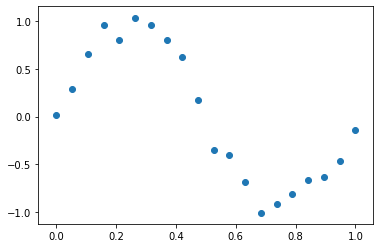

In [2]:
data_size = 20
X = np.linspace(0, 1, data_size)
noise = np.random.uniform(low=-1.0, high=1.0, size=data_size) * 0.2
y = np.sin(2.0 * np.pi * X) + noise

plt.scatter(X, y)

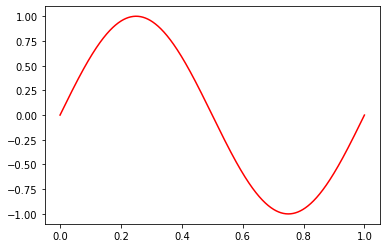

In [3]:
X_line = np.linspace(0, 1, 1000)
sin_X = np.sin(2.0 * np.pi * X_line)
plt.plot(X_line, sin_X, 'red')

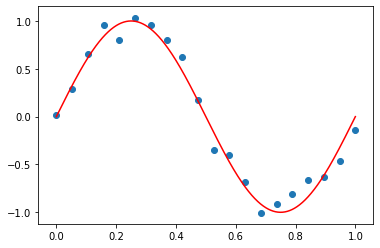

In [4]:
def plot_sin():
    plt.scatter(X, y)
    plt.plot(X_line, sin_X, 'red')
plot_sin()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(0.8424967230081887, array([-1.65775119]))

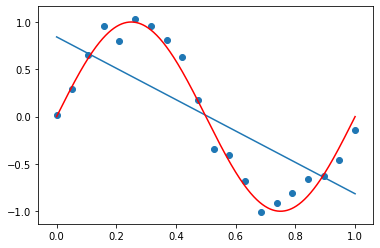

In [8]:
plt.plot(X_line, lin_reg.intercept_ + lin_reg.coef_ * X_line)
plot_sin()

In [9]:
X_2 = X ** 2

In [10]:
X_new = np.concatenate([X.reshape(-1, 1), X_2.reshape(-1, 1)], axis=1)

In [11]:
lin_reg_2 = LinearRegression().fit(X_new, y)

In [12]:
lin_reg_2.intercept_, lin_reg_2.coef_

(0.7929006997065388, array([-1.34364304, -0.31410815]))

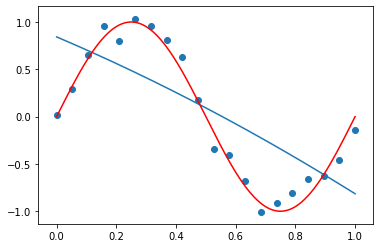

In [13]:
plt.plot(X_line, lin_reg.intercept_ + lin_reg_2.coef_[0] * X_line + lin_reg_2.coef_[1] * X_line ** 2)
plot_sin()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=3)
poly.fit(X.reshape(-1, 1))
X_poly_3 = poly.transform(X.reshape(-1, 1))

In [16]:
X_poly_3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [17]:
lin_reg_3 = LinearRegression().fit(X_poly_3, y)

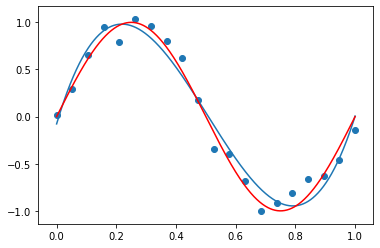

In [18]:
X_line_poly_3 = poly.fit_transform(X_line.reshape(-1, 1))
plt.plot(X_line, lin_reg_3.predict(X_line_poly_3))
plot_sin()

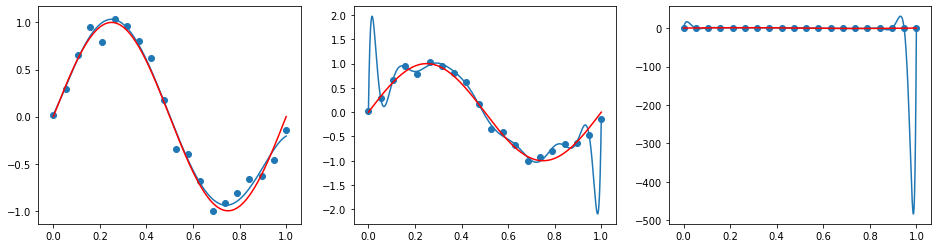

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for degree, ax in zip([5,15,25],axes):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    lin_reg = LinearRegression().fit(X_poly, y)
    X_line_poly = poly.fit_transform(X_line.reshape(-1, 1))
    ax.plot(X_line, lin_reg.predict(X_line_poly))
    ax.scatter(X, y)
    ax.plot(X_line, sin_X, 'red')

In [21]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
X, y = mglearn.datasets.load_extended_boston()

In [24]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [26]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868


In [27]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0)

In [28]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [32]:
round(lin_reg.score(X_train, y_train), 3),round(lin_reg.score(X_test, y_test), 3)

(0.952, 0.607)

In [33]:
from sklearn.linear_model import Ridge, Lasso

In [34]:
ridge = Ridge().fit(X_train, y_train)

In [35]:
def print_score(model):
    print(round(model.score(X_train, y_train), 3))
    print(round(model.score(X_test, y_test), 3))

In [39]:
print_score(ridge)

0.928
0.772


In [40]:
ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
print_score(ridge_10)

0.788
0.636


In [41]:
ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print_score(ridge_01)

0.928
0.772


In [42]:
coefficients = pd.DataFrame({'lin_reg':lin_reg.coef_, 
                             'ridge':ridge.coef_, 
                             'ridge_10': ridge_10.coef_, 
                             'ridge_01': ridge_01.coef_})

In [43]:
coefficients

,lin_reg,ridge,ridge_10,ridge_01
0,-412.710947,-2.333007,-0.811610,-2.333007
1,-52.243207,-5.441929,0.647609,-5.441929
2,-131.898815,-6.128655,-0.809783,-6.128655
3,-12.004136,-0.778525,0.311335,-0.778525
4,-15.510713,1.291530,-0.684624,1.291530
5,28.716334,19.022284,4.387976,19.022284
6,54.704099,4.358647,-0.147554,4.358647
7,-49.534666,-11.191107,-2.442141,-11.191107
8,26.582393,9.555397,0.845915,9.555397
9,37.062032,-0.748671,-1.147275,-0.748671


In [44]:
lasso = Lasso().fit(X_train, y_train)

In [45]:
print_score(lasso)

0.293
0.209


In [48]:
lasso_001 =  Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print_score(lasso_001)

0.896
0.766


In [49]:
coefficients = pd.DataFrame({'lin_reg':lin_reg.coef_, 
                             'lasso':ridge.coef_, 
                             'lasso_001': lasso_001.coef_})

In [50]:
coefficients

,lin_reg,lasso,lasso_001
0,-412.710947,-2.333007,-0.000000
1,-52.243207,-5.441929,-0.000000
2,-131.898815,-6.128655,-0.000000
3,-12.004136,-0.778525,0.000000
4,-15.510713,1.291530,-0.000000
5,28.716334,19.022284,0.000000
6,54.704099,4.358647,-0.000000
7,-49.534666,-11.191107,-1.432605
8,26.582393,9.555397,10.947712
9,37.062032,-0.748671,0.000000
